In [ ]:
#Assignment 2: Text classification for Sentimental analysis using KNN. (Refer any dataset like Titanic,Twitter, etc.)
#Name: Adwait Nitin Deshpande
#Class: TE-AIML
#Roll No: 33514

In [1]:
# Import the necessary libraries and load the dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('Tweets.csv')


In [2]:
# Preprocess the text data by removing stopwords, converting all text to lowercase, and applying stemming
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stopwords]
    return " ".join(words)

df['text'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
# Use the TfidfVectorizer to convert the preprocessed text data into a vector of features
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['airline_sentiment']


In [4]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train the KNN classifier and evaluate its performance on the testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7096994535519126


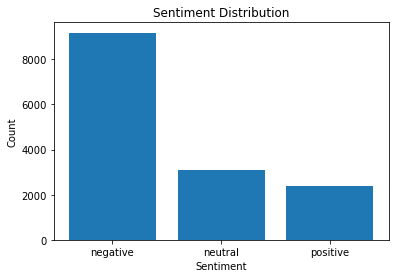

In [6]:
# This will display a bar plot showing the number of tweets for each sentiment label.
import matplotlib.pyplot as plt

sentiment_counts = df['airline_sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


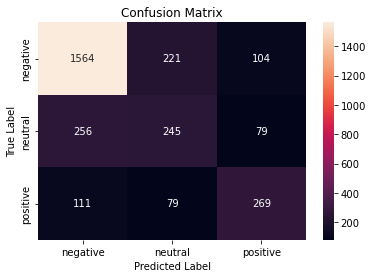

In [7]:
# This will display a heatmap of the confusion matrix, which shows the number of true positive, false positive, 
# true negative, and false negative predictions for each sentiment label.

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
